## Step:1 Dataset Description and Objective

**Dataset Description:**

The dataset comprises COVID-19 data, including confirmed cases, recoveries, and deaths, from various global regions with a focus on India. It is available in CSV and Excel formats, regularly updated. Each record includes the date, country/region, confirmed cases, recoveries, and deaths.

**Objective:**

This project aims to analyze COVID-19 trends using Python. Objectives include visualizing impacts, analyzing infection and recovery rates, predicting future cases using Facebook Prophet, and deriving actionable insights for informed decision-making.

## Step:2 Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

## Step:3 Data Collection and Preprocessing

**- Data loading**

In [2]:
df = pd.read_csv(r"E:\csv\Intel csv\covid_19_clean_complete (4).csv")
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

**- Inspect first few rows**
* to understand the structure of the data.

In [3]:
# Display first 5 rows
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

**- Checking column name**

In [4]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

* column names are inconsistent and difficult to manage, therefore I am going to rename them for clarity and ease of use.

**- Renaming the columns**
* This renaming ensures consistency and clarity in column names, which helps in avoiding confusion during data analysis and interpretation.

In [5]:
# Renaming the columns
df.rename(columns = {
    'Province/State': 'state',
    'Country/Region': 'country',
    'Lat':'lat',
    'Long':'long',
    'Date': 'date',
    'Confirmed':'confirmed',
    'Deaths':'deaths',
    'Recovered': 'recovered',
    'Active': 'active',
    'WHO Region':'WHO' 
}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      14664 non-null  object 
 1   country    49068 non-null  object 
 2   lat        49068 non-null  float64
 3   long       49068 non-null  float64
 4   date       49068 non-null  object 
 5   confirmed  49068 non-null  int64  
 6   deaths     49068 non-null  int64  
 7   recovered  49068 non-null  int64  
 8   active     49068 non-null  int64  
 9   WHO        49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


From the provided DataFrame, we can deduce the following information:

`Geographical Data:`
* The dataset contains information about COVID-19 cases across different geographical locations, including latitude (Lat) and longitude (Long) coordinates.
* Each entry corresponds to a specific province/state (Province/State) and country/region (Country/Region). 

`Temporal Data:` The dataset includes data recorded over time, with the Date column indicating the date of observation.   

`COVID-19 Metrics:` Key metrics related to the COVID-19 pandemic are recorded, including:     
* Confirmed: Total confirmed COVID-19 cases.
* Deaths: Total deaths attributed to COVID-19.
* Recovered: Total number of individuals who have recovered from COVID-19.
* Active: Total active cases (confirmed cases minus deaths and recoveries). 

`Data Types:` The data types of the columns include:
* Float64 for latitude and longitude coordinates (Lat and Long).
* Int64 for numerical data such as confirmed cases, deaths, recoveries, and active cases.
* Object for categorical data such as province/state, country/region, date, and WHO region.

`Missing Values:` There are missing values in the Province/State column, indicating that not all entries have province/state information.

`WHO Region:` The WHO Region column categorizes countries/regions into World Health Organization (WHO) regions, providing additional contextual information for analysis.

Overall, this DataFrame provides a comprehensive snapshot of COVID-19 cases, deaths, and recoveries across different geographical locations over time, enabling analysis and visualization of the pandemic's impact.

**- Checking for Duplicates:**
* Identify and remove duplicate rows in the dataset to ensure data integrity.

In [7]:
# Checking Duplicates Values
df.duplicated().sum()

0

* Sum is 0, meaning there are no duplicate rows in the DataFrame.

**- Summary Statisitc**

In [8]:
df.describe()

lat          long     confirmed         deaths     recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.600000e+01  
75%    6.060000e+02  
max    2.816444e+06

Overall, the describe method output offers valuable insights into the distribution, variability, and magnitude of COVID-19 metrics across different geographic locations and time periods. These insights can inform further analysis and decision-making related to the pandemic response and mitigation efforts.

**- Total no of active cases**

In [9]:
df['active'].sum()

396715350

**- Countrywise sum of confirmed, death, recovered and active cases**

In [10]:
top=df[df["date"]=="2020-07-27"]
world=top.groupby("country").sum()[["confirmed","deaths","recovered","active"]].reset_index()
world

country  confirmed  deaths  recovered  active
0           Afghanistan      36263    1269      25198    9796
1               Albania       4880     144       2745    1991
2               Algeria      27973    1163      18837    7973
3               Andorra        907      52        803      52
4                Angola        950      41        242     667
..                  ...        ...     ...        ...     ...
182  West Bank and Gaza      10621      78       3752    6791
183      Western Sahara         10       1          8       1
184               Yemen       1691     483        833     375
185              Zambia       4552     140       2815    1597
186            Zimbabwe       2704      36        542    2126

[187 rows x 5 columns]

## Step 4: Data Visualization

**4.1 Country-wise active cases**

In [11]:
# px.choropleth: This function from Plotly Express is used to create a choropleth map.

fig=px.choropleth(world,locations='country',
                  locationmode='country names',color='active',
                  hover_name='country', range_color=[1,15000],
                  color_continuous_scale="peach",title='Country-wise active cases')
fig.show()

* By looking at the above choropleth plot, we can get a general idea of which country has the most active cases and which has the least.

**4.2 Country-wise death cases**

In [12]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="deaths",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Country-wise death cases")
figure.show()

* By looking at the above choropleth plot, we can get a general idea of which country has the most death cases and which has the least.

**4.3 Country-wise recovered cases**

In [13]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="recovered",
                       hover_name="country",range_color=[1,10000],
                       color_continuous_scale="blues",
                       title="Country-wise recovered cases")
figure.show()

* By looking at the above choropleth plot, we can get a general idea of which country has the most recovered cases and which has the least.

## Step 5: Analyzing Trends

**5.1 Trend of COVID-19 spread over time**

In [14]:
# Group by date and sum confirmed cases
total_cases = df.groupby("date")['confirmed'].sum().reset_index()

# Create a trace for the trend of confirmed cases
trace = go.Scatter(x=total_cases['date'], y=total_cases['confirmed'], mode='lines', marker=dict(color='red'))

# Create layout
layout = go.Layout(title='Worldwide Confirmed Cases Over Time',
                   xaxis=dict(title='Dates', tickangle=90, tickfont=dict(size=10)),
                   yaxis=dict(title='Total cases', tickfont=dict(size=15)),
                   width=950, height=500)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()

* In the beginning, you can see that the number of cases is very low. However, gradually, and then suddenly, the number of COVID cases grows from March 17, 2020, to July 27, 2020

In [15]:
total_cases

date  confirmed
0    2020-01-22        555
1    2020-01-23        654
2    2020-01-24        941
3    2020-01-25       1434
4    2020-01-26       2118
..          ...        ...
183  2020-07-23   15510481
184  2020-07-24   15791645
185  2020-07-25   16047190
186  2020-07-26   16251796
187  2020-07-27   16480485

[188 rows x 2 columns]

* On January 22, 2020, the number of confirmed cases worldwide was 555.            
* On January 23, 2020, the number of confirmed cases worldwide was 654.         
* On July 27, 2020, the number of confirmed cases worldwide was 16,480,485.          

These data points indicate the progression of confirmed COVID-19 cases globally over time, highlighting the significant increase in cases from January to July 2020.

**5.2 Top 20 countries having most death cases**

In [16]:
top_deaths =df.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

country    deaths
0               US  11011411
1   United Kingdom   3997775
2           Brazil   3938034
3            Italy   3707717
4           France   3048524
5            Spain   3033030
6           Mexico   1728277
7            India   1111831
8             Iran   1024136
9          Belgium    963679
10         Germany    871322
11          Canada    699566
12           China    672413
13            Peru    652113
14     Netherlands    622314
15          Russia    619385
16          Turkey    466056
17          Sweden    448913
18         Ecuador    346618
19           Chile    322480

In [17]:
# Sort the data by deaths
top_deaths = top_deaths.sort_values(by='deaths', ascending=True)

# Create a horizontal bar plot
fig = go.Figure(go.Bar(
    x=top_deaths['deaths'],
    y=top_deaths['country'],
    orientation='h',  # horizontal bars
    marker=dict(color='red')  # bar color
))

# Customize layout
fig.update_layout(
    title='Top 20 Countries with Most Death Cases',
    xaxis=dict(title='Total Cases', tickfont=dict(size=15)),
    yaxis=dict(title='Country', tickfont=dict(size=15)),
    width=950, height=550
)

# Show plot
fig.show()


**5.3 Top 20 Countries with highest active cases**

In [18]:
top_actives =df.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

country     active
0               US  156981121
1           Brazil   31094060
2   United Kingdom   22624595
3           Russia   19668578
4            India   15987913
5           France   10980287
6            Spain    9277432
7           Canada    8656985
8             Peru    7748957
9            Italy    7363518
10        Pakistan    5633262
11    South Africa    5150341
12      Bangladesh    4924394
13     Netherlands    4528235
14          Sweden    4524247
15          Turkey    4091900
16        Colombia    3832786
17    Saudi Arabia    3783704
18         Belgium    3689945
19           Chile    3320581

In [19]:
# Sort the data by active cases 
top_actives = top_actives.sort_values(by='active', ascending=True)

# Create a horizontal bar plot
fig = go.Figure(go.Bar(
    x=top_actives['active'],
    y=top_actives['country'],
    orientation='h',  # horizontal bars
    marker=dict(color='blue')  # bar color
))

# Customize layout
fig.update_layout(
    title='Top 20 Countries with Most Active Cases',
    xaxis=dict(title='Total Cases', tickfont=dict(size=15)),
    yaxis=dict(title='Country', tickfont=dict(size=15)),
    width=950, height=550
)

# Show plot
fig.show()

**5.4 Top 20 Countries with highest confirmed cases**

In [20]:
top_confirmed =df.groupby(by="country")["confirmed"].sum().sort_values(ascending=False).head(20).reset_index()
top_confirmed

country  confirmed
0               US  224345948
1           Brazil   89524967
2           Russia   45408411
3            India   40883464
4            Spain   27404045
5   United Kingdom   26748587
6            Italy   26745145
7           France   21210926
8          Germany   21059152
9             Iran   19339267
10            Peru   19263916
11          Turkey   17903345
12           Chile   16935654
13          Mexico   14946202
14           China   14132002
15        Pakistan   12833994
16    Saudi Arabia   12362961
17    South Africa   11168743
18          Canada    9356551
19      Bangladesh    8754729

In [21]:
# Sort the data by confirmed cases 
top_confirmed = top_confirmed.sort_values(by='confirmed', ascending=True)

# Create a horizontal bar plot
fig = go.Figure(go.Bar(
    x=top_confirmed['confirmed'],
    y=top_confirmed['country'],
    orientation='h',  # horizontal bars
    marker=dict(color='green')  # bar color
))

# Customize layout
fig.update_layout(
    title='Top 20 Countries with Most Confirmed Cases',
    xaxis=dict(title='Total Cases', tickfont=dict(size=15)),
    yaxis=dict(title='Country', tickfont=dict(size=15)),
    width=950, height=550
)

# Show plot
fig.show()

**5.5 Day-wise recovered, deaths, confirmed, and active cases for the 'top 5 countries with the most active cases'**
* The top 5 countries with the highest active cases are: US, Brazil, UK, Russia, and India.

**5.5.1 For US**

In [22]:
US = df[df.country=="US"]
US = US.groupby(by="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()

In [23]:
US

date  recovered  deaths  confirmed   active
0    2020-01-22          0       0          1        1
1    2020-01-23          0       0          1        1
2    2020-01-24          0       0          2        2
3    2020-01-25          0       0          2        2
4    2020-01-26          0       0          5        5
..          ...        ...     ...        ...      ...
183  2020-07-23    1233269  144430    4038816  2661117
184  2020-07-24    1261624  145560    4112531  2705347
185  2020-07-25    1279414  146465    4178970  2753091
186  2020-07-26    1297863  146935    4233923  2789125
187  2020-07-27    1325804  148011    4290259  2816444

[188 rows x 5 columns]

**5.5.2 For Brazil**

In [24]:
Brazil = df[df.country=="Brazil"]
Brazil = Brazil.groupby(by="date")[["recovered","deaths","confirmed","active"]].sum().reset_index()

In [25]:
Brazil

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23    1620313   84082    2287475  583080
184  2020-07-24    1693214   85238    2343366  564914
185  2020-07-25    1785359   86449    2394513  522705
186  2020-07-26    1812913   87004    2419091  519174
187  2020-07-27    1846641   87618    2442375  508116

[188 rows x 5 columns]

**5.5.3 For UK**

In [26]:
UK = df[df.country =="United Kingdom"]
UK = UK.groupby(by = "date")[["recovered", "deaths", "confirmed", "active"]].sum().reset_index()

In [27]:
UK

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23       1425   45639     298731  251667
184  2020-07-24       1425   45762     299500  252313
185  2020-07-25       1427   45823     300270  253020
186  2020-07-26       1434   45837     301020  253749
187  2020-07-27       1437   45844     301708  254427

[188 rows x 5 columns]

**5.5.4 For Russia**

In [28]:
Russia = df[df.country == "Russia"]
Russia = Russia.groupby(by = "date")[["recovered", "deaths", "confirmed", "active"]].sum().reset_index()

In [29]:
Russia

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     579295   12873     793720  201552
184  2020-07-24     587728   13026     799499  198745
185  2020-07-25     596064   13172     805332  196096
186  2020-07-26     599172   13249     811073  198652
187  2020-07-27     602249   13334     816680  201097

[188 rows x 5 columns]

**5.5.5 For India**

In [30]:
India = df[df.country =="India"]
India = India.groupby(by = "date")[["recovered", "deaths", "confirmed", "active"]].sum().reset_index()

In [31]:
India

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23     817209   30601    1288108  440298
184  2020-07-24     849432   31358    1337024  456234
185  2020-07-25     885573   32060    1385635  468002
186  2020-07-26     917568   32771    1435616  485277
187  2020-07-27     951166   33408    1480073  495499

[188 rows x 5 columns]

**5.6 Top 5 Countries: COVID-19 Confirmed Cases Over Time**

In [32]:
# Add figsize as width and height
figsize = (2, 2)

# Create traces for each country
trace_us = go.Scatter(x=US.index, y=US['confirmed'], mode='lines', name='US', line=dict(color='pink'))
trace_brazil = go.Scatter(x=Brazil.index, y=Brazil['confirmed'], mode='lines', name='Brazil', line=dict(color='blue'))
trace_uk = go.Scatter(x=UK.index, y=UK['confirmed'], mode='lines', name='UK', line=dict(color='yellow'))
trace_russia = go.Scatter(x=Russia.index, y=Russia['confirmed'], mode='lines', name='Russia', line=dict(color='green'))
trace_india = go.Scatter(x=India.index, y=India['confirmed'], mode='lines', name='India', line=dict(color='red'))

# Combine traces into data list
data = [trace_us, trace_brazil, trace_uk, trace_russia, trace_india]

# Define layout
layout = go.Layout(
    title='Top 5 Countries: COVID-19 Confirmed Cases Over Time',
    xaxis=dict(title='No. of days', tickfont=dict(size=20)),
    yaxis=dict(title='Confirmed cases', tickfont=dict(size=20)),
    width=950, height=500
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()

* The United States has the highest number of confirmed cases, followed by Brazil, India, Russia, the United Kingdom, and so forth.

**5.7 Top 5 Countries: COVID-19 Death Cases Over Time**

In [33]:
# Create traces for each country
trace_us = go.Scatter(x=US.index, y=US['deaths'], mode='lines', name='US', line=dict(color='pink'))
trace_brazil = go.Scatter(x=Brazil.index, y=Brazil['deaths'], mode='lines', name='Brazil', line=dict(color='blue'))
trace_uk = go.Scatter(x=UK.index, y=UK['deaths'], mode='lines', name='UK', line=dict(color='yellow'))
trace_russia = go.Scatter(x=Russia.index, y=Russia['deaths'], mode='lines', name='Russia', line=dict(color='green'))
trace_india = go.Scatter(x=India.index, y=India['deaths'], mode='lines', name='India', line=dict(color='red'))

# Combine traces into data list
data = [trace_us, trace_brazil, trace_uk, trace_russia, trace_india]

# Define layout
layout = go.Layout(
    title='Top 5 Countries: COVID-19 Death Cases Over Time',
    xaxis=dict(title='No. of days', tickfont=dict(size=20)),
    yaxis=dict(title='Death cases', tickfont=dict(size=20)),
    width=950, height=500
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()

* The United States has the highest number of death cases, followed by Brazil, UK, India, the Russia, and so forth.

**5.8 Top 5 Countries: COVID-19 Recovered Cases Over Time**

In [34]:
# Create traces for each country
trace_us = go.Scatter(x=US.index, y=US['recovered'], mode='lines', name='US', line=dict(color='pink'))
trace_brazil = go.Scatter(x=Brazil.index, y=Brazil['recovered'], mode='lines', name='Brazil', line=dict(color='blue'))
trace_uk = go.Scatter(x=UK.index, y=UK['recovered'], mode='lines', name='UK', line=dict(color='yellow'))
trace_russia = go.Scatter(x=Russia.index, y=Russia['recovered'], mode='lines', name='Russia', line=dict(color='green'))
trace_india = go.Scatter(x=India.index, y=India['recovered'], mode='lines', name='India', line=dict(color='red'))

# Combine traces into data list
data = [trace_us, trace_brazil, trace_uk, trace_russia, trace_india]

# Define layout
layout = go.Layout(
    title='Top 5 Countries: COVID-19 Recovered Cases Over Time',
    xaxis=dict(title='No. of days', tickfont=dict(size=20)),
    yaxis=dict(title='Recovered cases', tickfont=dict(size=20)),
    width=950, height=500
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()

* The Brazil has the highest number of recovered cases, followed by US, India, Russia, the United Kingdom, and so forth.

## Step 6: Time Series Modeling:

>**FORECASTING USING FBPROPHET**
>
>* so previosly we have discussed ARIMA, SARIMA, SARIMAX so in order to build these models we have to make our data stationary first then only we can build these models
><br>
>
>* `But if you using FBPROPHET then here is no need to make data stationary --> to do accurate time-series forecasting`
>* FBPROPHET is open-sourced library by Facebook that is designed for creating accurate time-series forecasts.
>* Whether it's daily observations, irregular intervals, or seasonality present in our data

**6.1 Installing FBPROPHET**

In [35]:
!pip install prophet

**6.2 Importing prophet class**

In [36]:
from prophet import Prophet

**6.3 Data Preprocessing for FBPROPHET**

In [37]:
df.head()

state      country       lat       long        date  confirmed  deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   recovered  active                    WHO  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [38]:
# Checking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      14664 non-null  object 
 1   country    49068 non-null  object 
 2   lat        49068 non-null  float64
 3   long       49068 non-null  float64
 4   date       49068 non-null  object 
 5   confirmed  49068 non-null  int64  
 6   deaths     49068 non-null  int64  
 7   recovered  49068 non-null  int64  
 8   active     49068 non-null  int64  
 9   WHO        49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [39]:
# converting date column in standard date format
df["date"]=pd.to_datetime(df["date"])

In [40]:
df.head()

state      country       lat       long       date  confirmed  deaths  \
0   NaN  Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300 2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600 2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800 2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900 2020-01-22          0       0   

   recovered  active                    WHO  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      14664 non-null  object        
 1   country    49068 non-null  object        
 2   lat        49068 non-null  float64       
 3   long       49068 non-null  float64       
 4   date       49068 non-null  datetime64[ns]
 5   confirmed  49068 non-null  int64         
 6   deaths     49068 non-null  int64         
 7   recovered  49068 non-null  int64         
 8   active     49068 non-null  int64         
 9   WHO        49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


**Note for FBProphet:**

`In FBProphet, the input DataFrame should contain only two columns:`
* ds (Date): This column represents the independent variable, typically denoting the time or date.
* y: This column represents the dependent variable, which is the quantity you want to forecast, such as the number of confirmed cases, deaths, or recoveries.

**6.4 Here we are creating a separate DataFrame for confirmed case which have only 2 column**

In [42]:
confirmed=df.groupby("date").sum()["confirmed"].reset_index()
confirmed

date  confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

**6.5 Here we are creating a separate DataFrame for "death" cases which have only 2 column**

In [43]:
deaths=df.groupby("date").sum()["deaths"].reset_index()
deaths

date  deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

**6.6 Here we are creating a separate DataFrame for "recovered" cases which have only 2 column**

In [44]:
recovered=df.groupby("date").sum()["recovered"].reset_index()
recovered

date  recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

**6.7 Here we are creating a separate DataFrame for "active" cases which have only 2 column**

In [45]:
active=df.groupby("date").sum()["active"].reset_index()
active

date   active
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

## Step 7: Prediction and Visualization:

**7.1 Forecasting for the confirmed cases** 

In [46]:
confirmed.rename(columns={"date":"ds","confirmed":"y"},inplace=True)

In [47]:
confirmed

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

**7.1.1 Defining the Confidence Interval in Prophet's Forecasting**
* interval_width is nothing but confidence interval means we have confidence of 95% that prediction is correct and 5% i am taking as error margin

In [48]:
con_model=Prophet(interval_width=0.95)  

**7.1.2 Model Training: Fitting Data to the Model**

In [49]:
con_model.fit(confirmed)

12:28:25 - cmdstanpy - INFO - Chain [1] start processing
12:28:25 - cmdstanpy - INFO - Chain [1] done processing


**7.1.3 Forecasting confirmed case for over 7 days**
* periods = 7 means, we are forecasting confirmed case for over 7 days
* above you see we have 188 rows --> afterrunning this code 7 more days added now row will become = 188+7 = 195

In [50]:
future=con_model.make_future_dataframe(periods=7)

In [51]:
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [52]:
forecast=con_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  1.632401e+07  1.616301e+07  1.648659e+07
189 2020-07-29  1.653405e+07  1.637561e+07  1.668952e+07
190 2020-07-30  1.674820e+07  1.658419e+07  1.691370e+07
191 2020-07-31  1.696362e+07  1.679286e+07  1.713256e+07
192 2020-08-01  1.717143e+07  1.699861e+07  1.734335e+07
193 2020-08-02  1.736922e+07  1.720041e+07  1.756029e+07
194 2020-08-03  1.756410e+07  1.739893e+07  1.774930e+07

**7.1.4 Visualization of Confirmed Cases Historical + Forecast of 7 days**

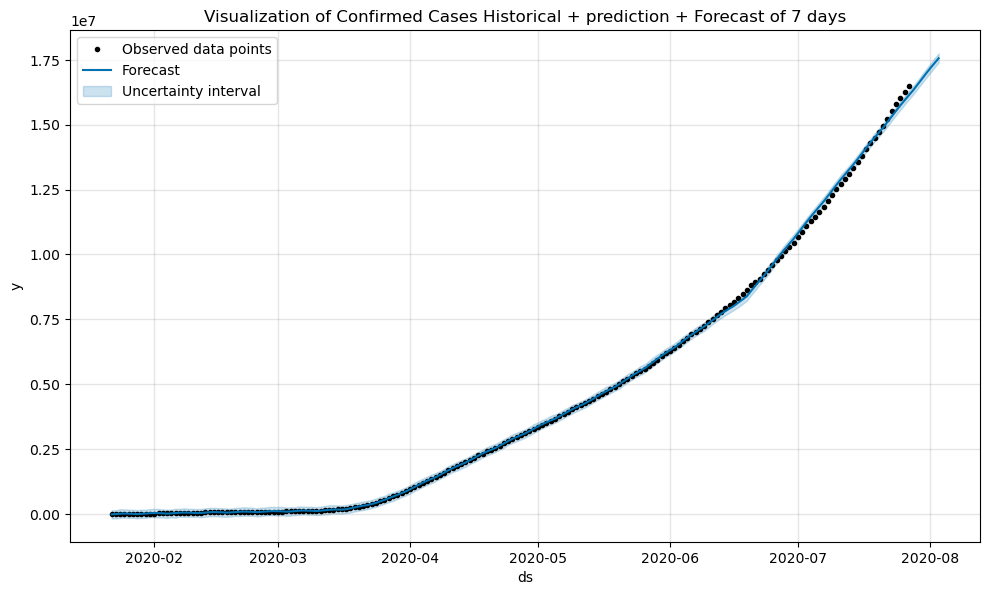

In [53]:
confirmed_plot=con_model.plot(forecast)
plt.legend()
plt.title("Visualization of Confirmed Cases Historical + prediction + Forecast of 7 days")
plt.show()

* In this graph, if you observe, the black dots represent the actual data.
* The blue line represents the "prediction" or "y-hat".
* At the end of the black dots, if you notice the blue line further extending, it signifies the "prediction of future 7 days confirmed cases".
* Now, observing the blue line closely, you'll discern a blurry shadow around it, denoting the "5% margin of error" or deviation region.
* This implies that our prediction can vary up to the upper blurry point, i.e., the maximum value represented by yhat_uppermargin, and down to the lower blurry point, i.e., the minimum value represented by yhat_lowermargin.

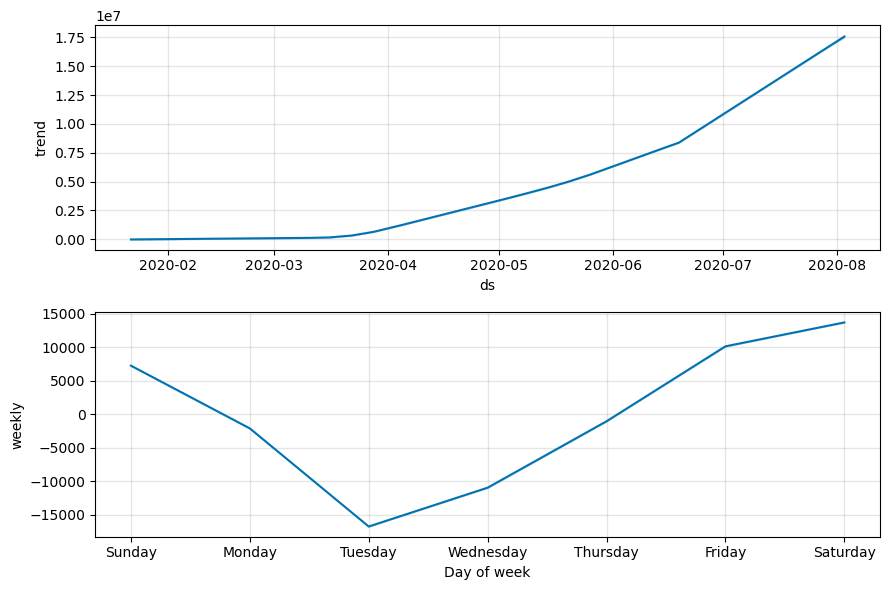

In [54]:
confirmed_forecast_plot1 = con_model.plot_components(forecast)
plt.show()

* Trend: This represents the trend in our data.
* Weekly: This indicates the future 7-day predictions provided by our model.
    * On Sunday, cases are projected to be 7000, followed by a sudden decrease on Monday, and a further decrease on Tuesday.
    * Subsequently, after Tuesday, there is an increase in confirmed cases.

**7.2 Forecasting for death cases:**

In [55]:
deaths

date  deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [56]:
deaths.rename(columns={"date":"ds","deaths":"y"},inplace=True)

In [57]:
deaths

ds       y
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
..         ...     ...
183 2020-07-23  633506
184 2020-07-24  639650
185 2020-07-25  644517
186 2020-07-26  648621
187 2020-07-27  654036

[188 rows x 2 columns]

In [58]:
death_model=Prophet(interval_width=0.95)

In [59]:
# Model training
death_model.fit(deaths)

12:28:26 - cmdstanpy - INFO - Chain [1] start processing
12:28:26 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future=death_model.make_future_dataframe(periods=7)

In [61]:
forecast=death_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

ds           yhat     yhat_lower     yhat_upper
188 2020-07-28  652342.857217  649693.853330  655425.901755
189 2020-07-29  657910.776693  654824.328463  661166.928033
190 2020-07-30  663521.743356  660167.883147  666552.225427
191 2020-07-31  669038.962960  665800.517876  672728.034949
192 2020-08-01  673922.465056  670031.859264  678046.231116
193 2020-08-02  678060.469456  673166.564782  682549.570900
194 2020-08-03  682351.854619  676744.750670  687701.863193

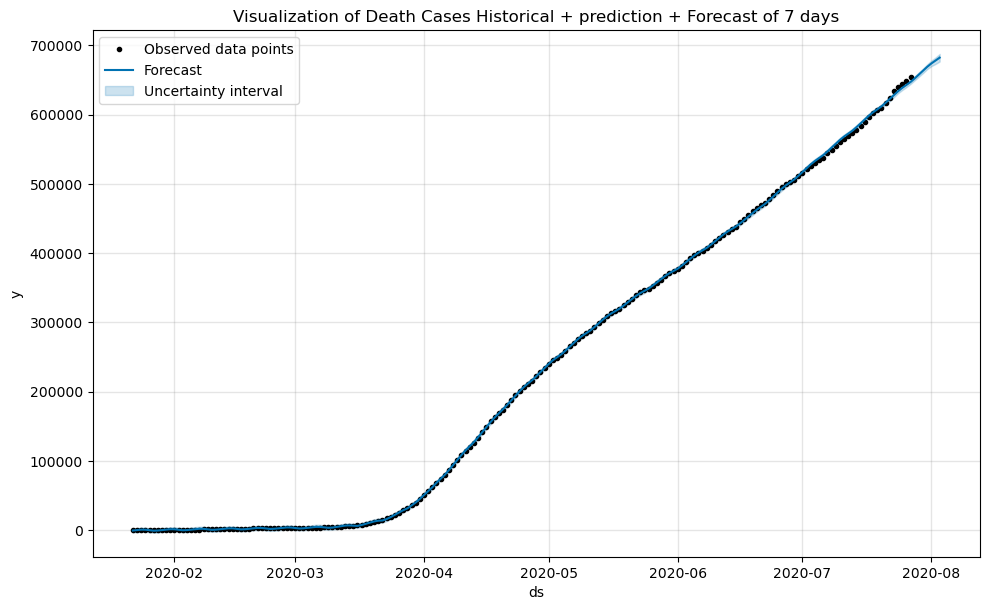

In [62]:
death_plot=death_model.plot(forecast)
plt.legend()
plt.title("Visualization of Death Cases Historical + prediction + Forecast of 7 days")
plt.show()

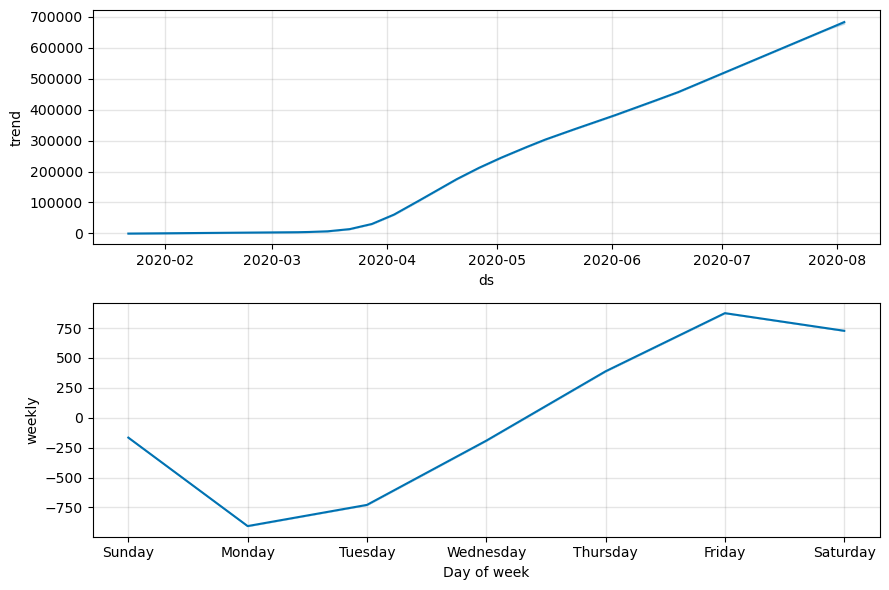

In [63]:
death_forecast_plot1 = death_model.plot_components(forecast)

From the plot we can say that On Sunday, the number of deaths decreases Then, from Monday to Friday, deaths increase up to around 800, and from Friday to Saturday, there's a slight decrease back to around 750.

**7.3 Forecasting for recovered cases:** 

In [64]:
recovered

date  recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

In [65]:
recovered.rename(columns={"date":"ds","recovered":"y"},inplace=True)

In [66]:
recovered

ds        y
0   2020-01-22       28
1   2020-01-23       30
2   2020-01-24       36
3   2020-01-25       39
4   2020-01-26       52
..         ...      ...
183 2020-07-23  8710969
184 2020-07-24  8939705
185 2020-07-25  9158743
186 2020-07-26  9293464
187 2020-07-27  9468087

[188 rows x 2 columns]

In [67]:
recovered_model=Prophet(interval_width=0.95)

In [68]:
# Training of Model (fiting thr data to the model)
recovered_model.fit(recovered)

12:28:27 - cmdstanpy - INFO - Chain [1] start processing
12:28:27 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future=recovered_model.make_future_dataframe(periods=7)

In [70]:
forecast=recovered_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  9.313528e+06  9.188749e+06  9.429562e+06
189 2020-07-29  9.455717e+06  9.332614e+06  9.573421e+06
190 2020-07-30  9.598531e+06  9.468153e+06  9.714758e+06
191 2020-07-31  9.740095e+06  9.612710e+06  9.865031e+06
192 2020-08-01  9.880394e+06  9.750760e+06  1.000896e+07
193 2020-08-02  1.000646e+07  9.876847e+06  1.013412e+07
194 2020-08-03  1.014305e+07  1.001207e+07  1.026529e+07

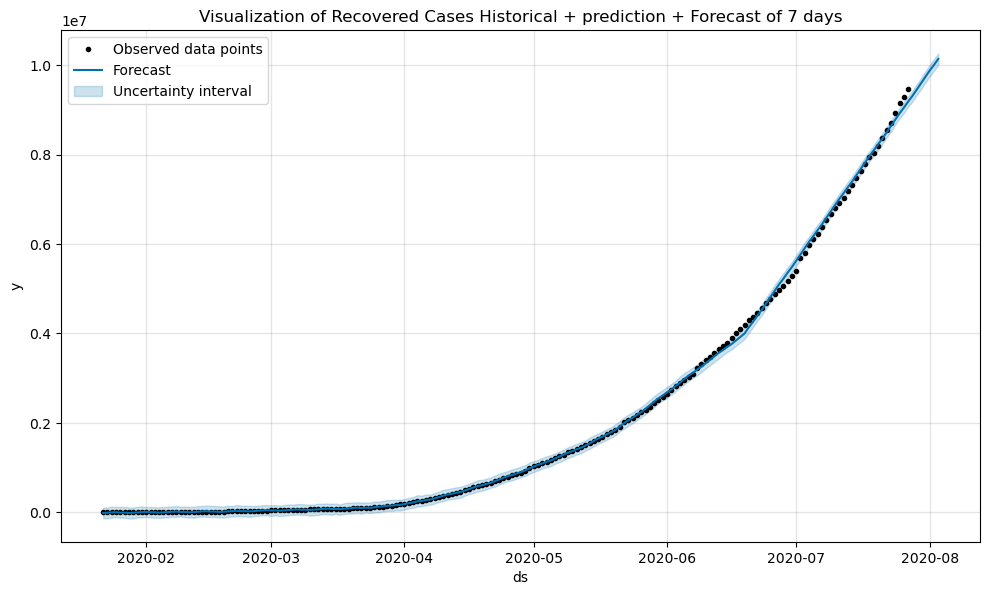

In [71]:
recovered_plot=recovered_model.plot(forecast)
plt.legend()
plt.title("Visualization of Recovered Cases Historical + prediction + Forecast of 7 days")
plt.show()

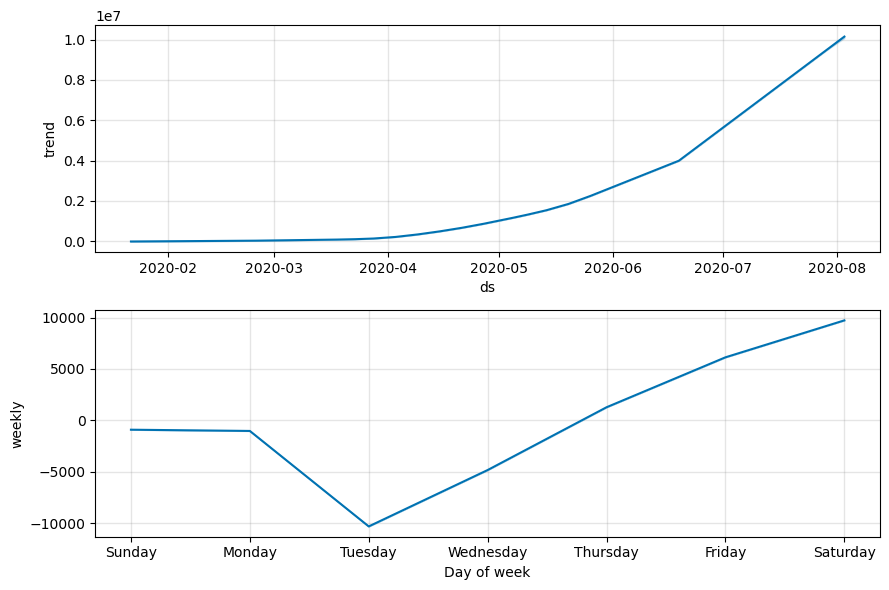

In [72]:
recovered_forecast_plot1 = recovered_model.plot_components(forecast)

**7.4 Forecasting for active cases:**

In [73]:
active

date   active
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

In [74]:
active.rename(columns={"date":"ds","active":"y"},inplace=True)

In [75]:
active

ds        y
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

In [76]:
active_model=Prophet(interval_width=0.95)

In [77]:
# Training of Model (fiting thr data to the model)
active_model.fit(active)

12:28:28 - cmdstanpy - INFO - Chain [1] start processing
12:28:28 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
future=active_model.make_future_dataframe(periods=7)

In [79]:
forecast=active_model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  6.353204e+06  6.282093e+06  6.422769e+06
189 2020-07-29  6.415552e+06  6.346125e+06  6.483009e+06
190 2020-07-30  6.481007e+06  6.408321e+06  6.551307e+06
191 2020-07-31  6.549045e+06  6.475991e+06  6.618055e+06
192 2020-08-01  6.611208e+06  6.538502e+06  6.676461e+06
193 2020-08-02  6.678514e+06  6.610674e+06  6.756659e+06
194 2020-08-03  6.732249e+06  6.656383e+06  6.811411e+06

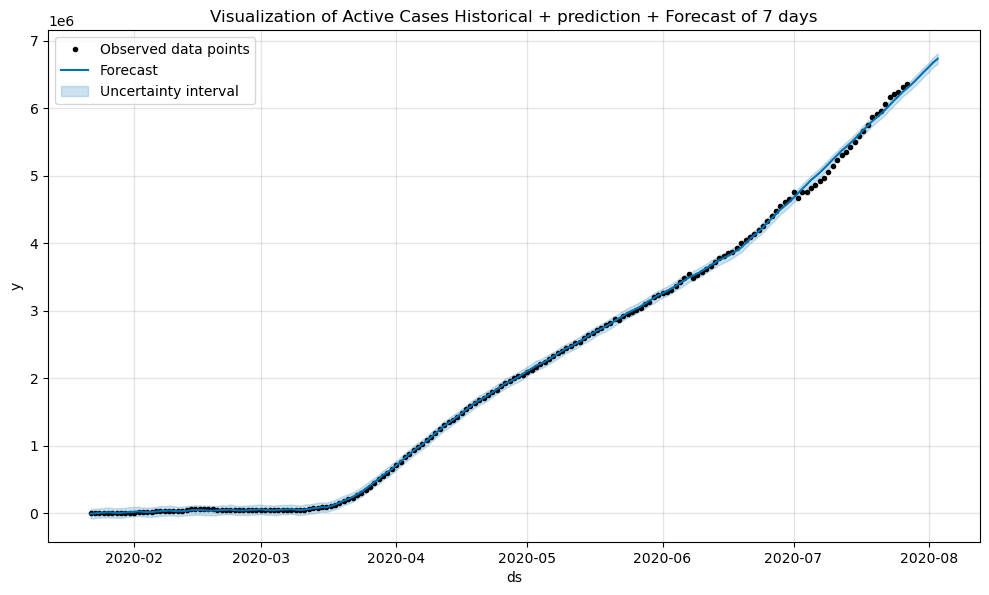

In [80]:
active_plot=active_model.plot(forecast)
plt.legend()
plt.title("Visualization of Active Cases Historical + prediction + Forecast of 7 days")
plt.show()

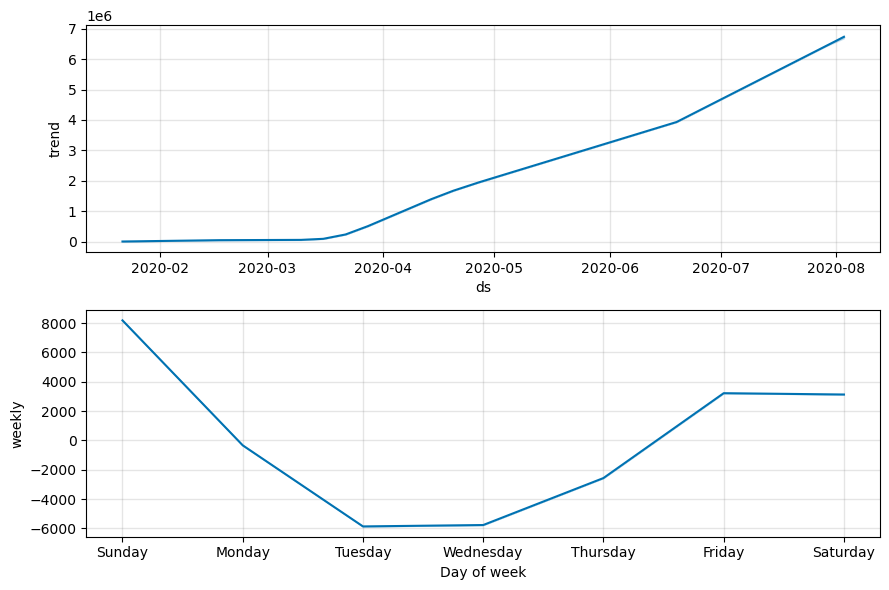

In [81]:
active_forecast_plot1 = active_model.plot_components(forecast)

## Step 8: Model Saving and Loading

### 8.1: Import necessary libraries

In [82]:
!pip install joblib
import joblib
from prophet import Prophet

### 8.2: Saving trained models

In [83]:
# Save the trained confirmed model
joblib.dump(con_model, 'model/prophet_model_confirmed.joblib')

# Save the trained death model
joblib.dump(death_model, 'model/prophet_model_death.joblib')

# Save the trained recovered model
joblib.dump(recovered_model, 'model/prophet_model_recovered.joblib')

# Save the trained active model
joblib.dump(active_model, 'model/prophet_model_active.joblib')

print("Models saved successfully!")

Models saved successfully!


### 8.3: Loading Models 

In [84]:
# Import necessary libraries
import joblib
from prophet import Prophet

# Load the trained confirmed model
loaded_con_model = joblib.load('model/prophet_model_confirmed.joblib')

# Load the trained death model
loaded_death_model = joblib.load('model/prophet_model_death.joblib')

# Load the trained recovered model
loaded_recovered_model = joblib.load('model/prophet_model_recovered.joblib')

# Load the trained active model
loaded_active_model = joblib.load('model/prophet_model_active.joblib')

print("Model loaded successfully")

Model loaded successfully


### 8.4: Making predictions

Future predictions generated successfully!


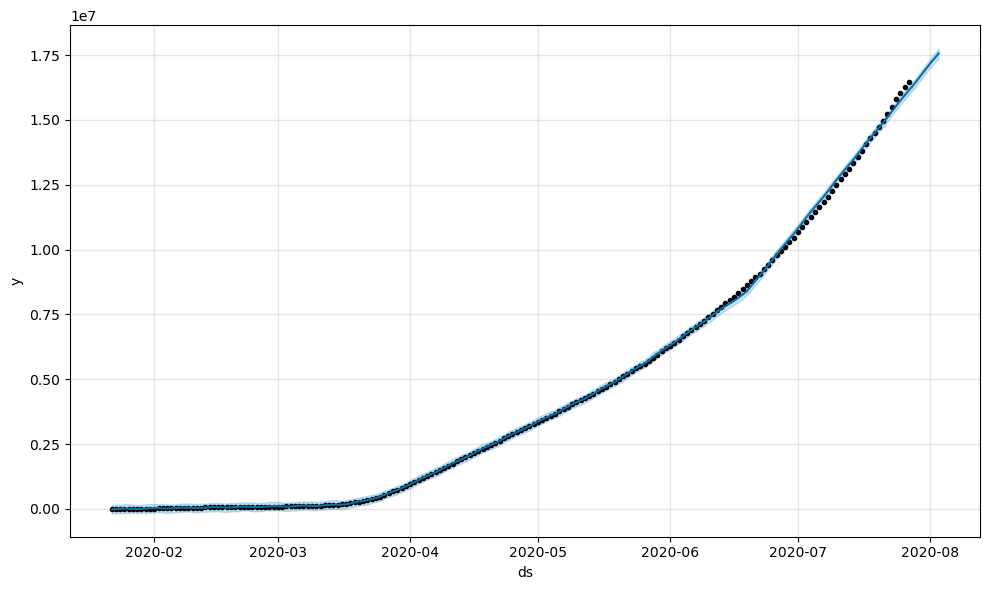

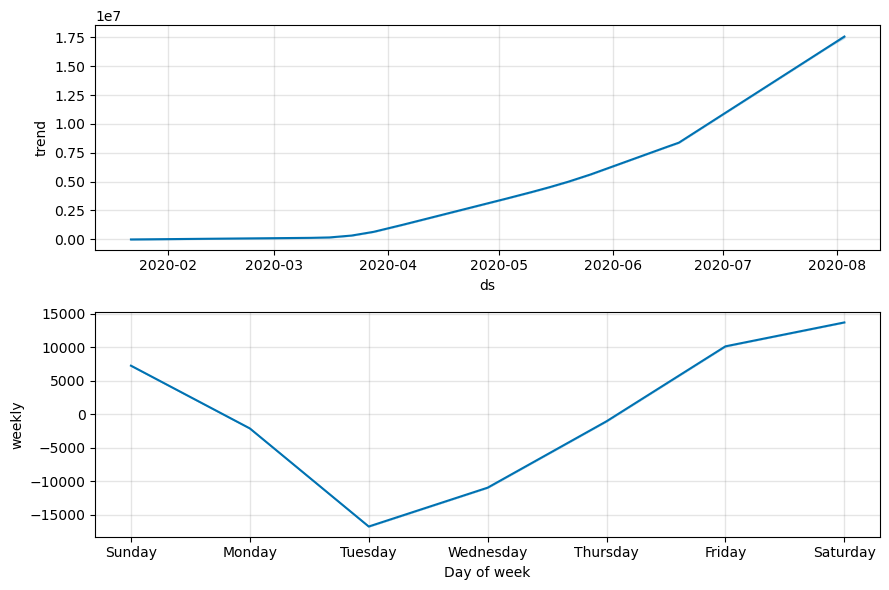

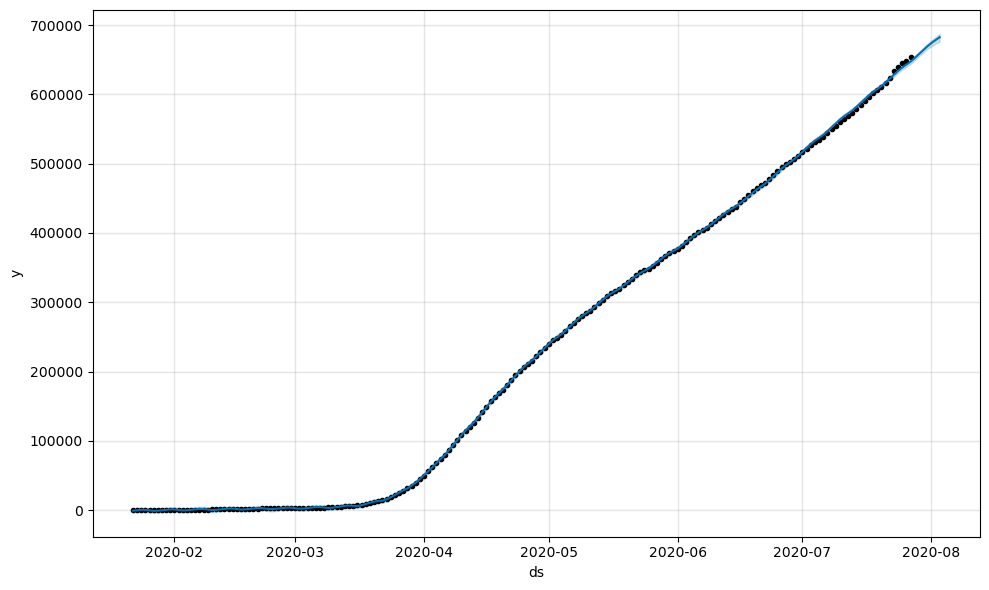

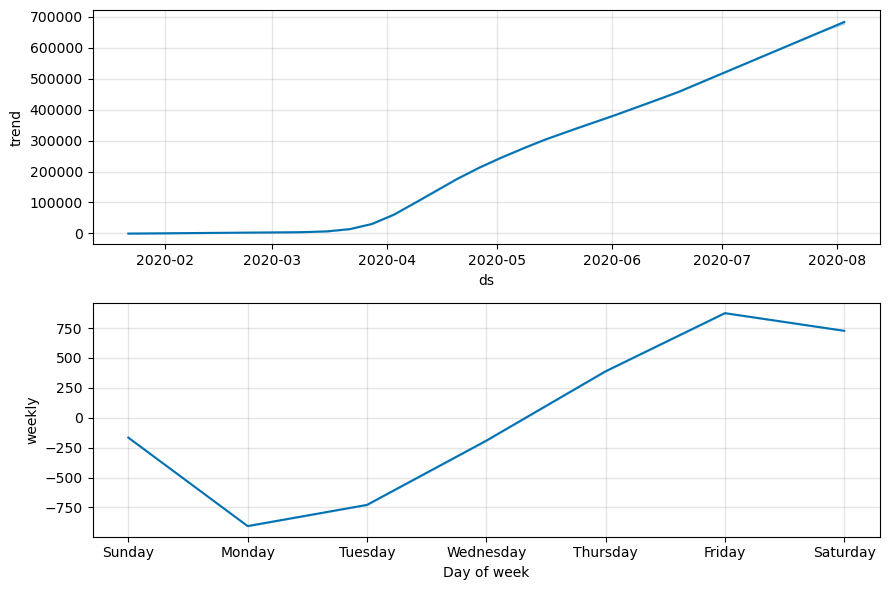

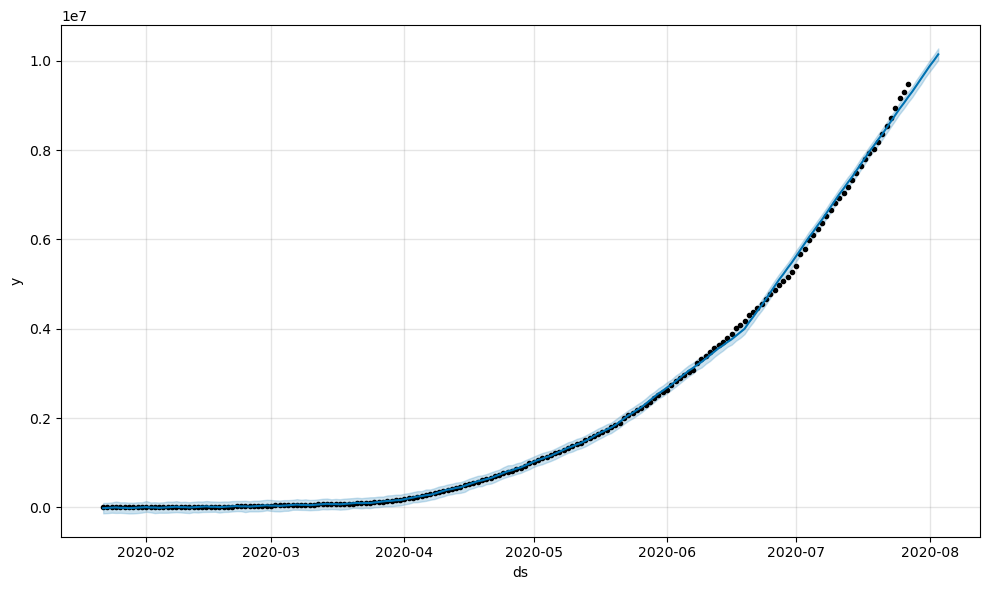

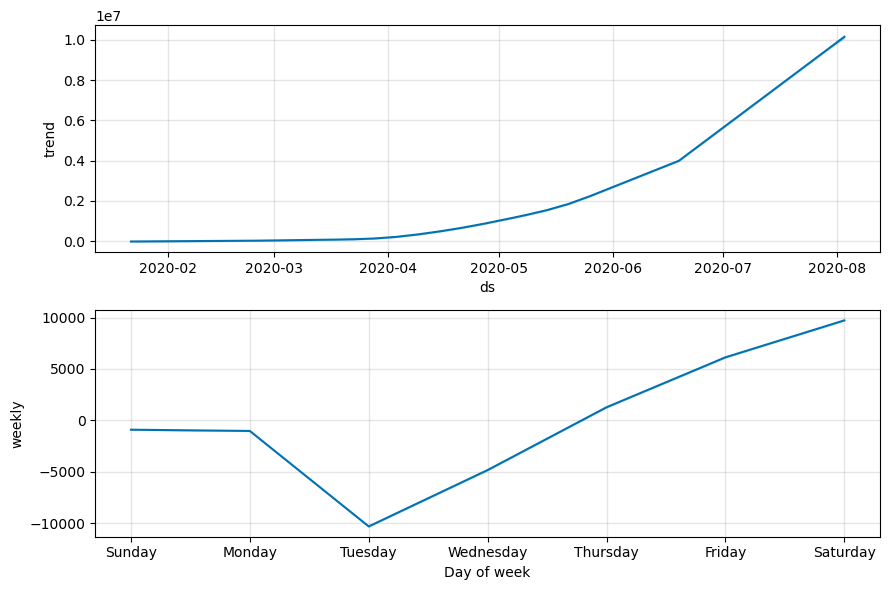

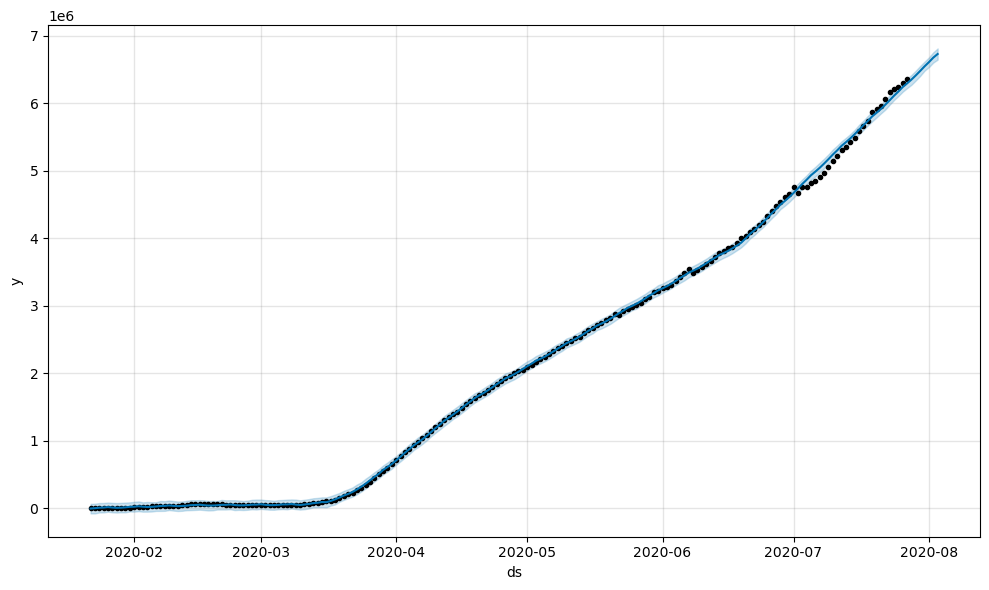

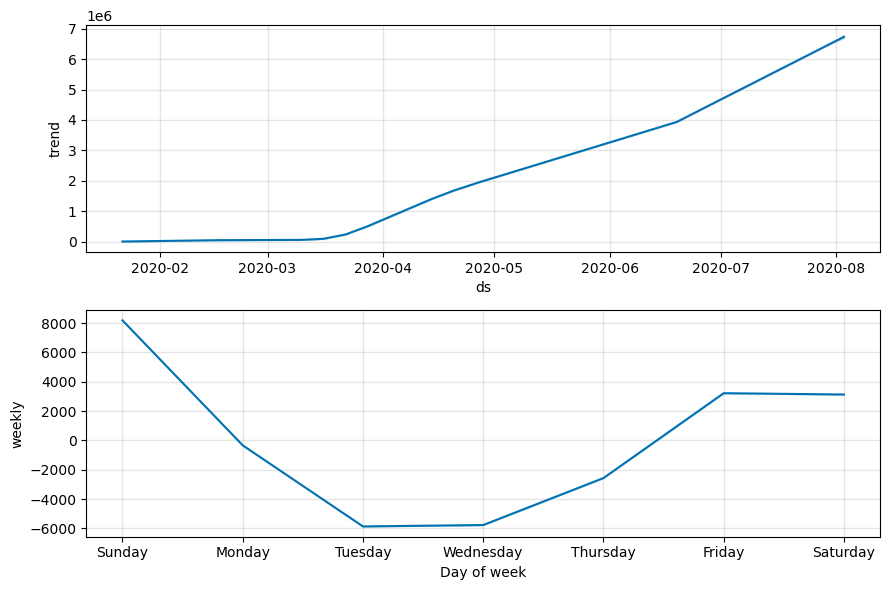

In [85]:
# Future predictions using the loaded confirmed model
future = loaded_con_model.make_future_dataframe(periods=7)
forecast = loaded_con_model.predict(future)
confirmed_plot = loaded_con_model.plot(forecast)
confirmed_forecast_plot1 = loaded_con_model.plot_components(forecast)

# Future predictions using the loaded death model
future = loaded_death_model.make_future_dataframe(periods=7)
forecast = loaded_death_model.predict(future)
death_plot = loaded_death_model.plot(forecast)
death_forecast_plot1 = loaded_death_model.plot_components(forecast)

# Future predictions using the loaded recovered model
future = loaded_recovered_model.make_future_dataframe(periods=7)
forecast = loaded_recovered_model.predict(future)
recovered_plot = loaded_recovered_model.plot(forecast)
recovered_forecast_plot1 = loaded_recovered_model.plot_components(forecast)

# Future predictions using the loaded active model
future = loaded_active_model.make_future_dataframe(periods=7)
forecast = loaded_active_model.predict(future)
active_plot = loaded_active_model.plot(forecast)
active_forecast_plot1 = loaded_active_model.plot_components(forecast)

print("Future predictions generated successfully!")

## Step 9: Conclusion

Throughout the analyzed period from January to April, the recorded COVID-19 cases showed a relatively stable trend without significant fluctuations. However, from April onwards, a notable shift occurred, marked by an exponential increase in confirmed cases, active infections, deaths, and recoveries.

By examining the visualizations of confirmed cases, active infections, recoveries, and deaths, coupled with a 7-day forecast and historical data, we discern a consistent pattern with gradual changes over time. Yet, focusing specifically on the data from the last 7 days reveals more nuanced insights, showcasing sudden spikes and declines in case numbers.

This analysis underscores the importance of closely monitoring recent trends for timely intervention and response. Understanding these fluctuations in the short term can aid in implementing targeted strategies to mitigate the spread of the virus and manage healthcare resources effectively.

Moving forward, continued vigilance and adaptive measures are imperative to navigate the dynamic landscape of the COVID-19 pandemic and safeguard public health.